<a href="https://colab.research.google.com/github/Byounghakim/CMX/blob/main/CMX_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

공정평가 및 주성분 함량 **분석**

1차 추출 등 , 비교 0.01mg/g 등 내용은 추가

누적 csv

샘플 이름을 입력하세요: test9
test9의 브레빌린 A 피크 면적 값을 입력하세요: 1211334
검액의 희석 배수를 입력하세요: 1
분석 시간: 2024-06-04 09:07:32
샘플 이름: test9
피크 면적 값 (AT): 1211334.0, 희석 배수: 1.0
계산된 농도: 0.02 mg/g


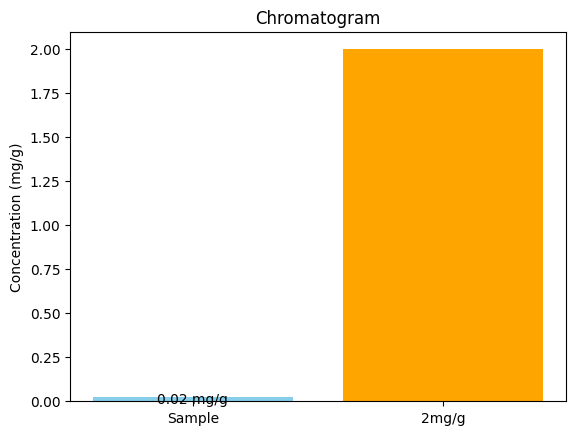

In [4]:
import csv
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone

def calculate_concentration(AT_input, DT_input, a=51925172.88, b=8388.80):
    """
    브레빌린 A의 농도를 계산합니다.

    Parameters:
    AT_input (float): 브레빌린 A의 측정한 피크 면적 값
    DT_input (float): 검액의 희석 배수
    a (float): 기울기 (기본값 51925172.88)
    b (float): Y절편 (기본값 8388.80)

    Returns:
    float: 계산된 농도 (mg/g)
    """

    # 농도 계산 (단위: mg/g)
    concentration = (AT_input - b) / a * DT_input

    return concentration

# 사용자로부터 샘플 이름, 피크 면적 값, 검액의 희석 배수를 입력받음
sample_name = input("샘플 이름을 입력하세요: ")
AT_input = float(input(f"{sample_name}의 브레빌린 A 피크 면적 값을 입력하세요: "))
DT_input = float(input("검액의 희석 배수를 입력하세요: "))

# 농도 계산
concentration = calculate_concentration(AT_input, DT_input)

# 현재 로컬 시간 (한국 시간)
korea_time = datetime.now(timezone('Asia/Seoul')).strftime("%Y-%m-%d %H:%M:%S")

# 결과 출력 (소수점 둘째 자리까지 출력)
print(f'분석 시간: {korea_time}')
print(f'샘플 이름: {sample_name}')
print(f'피크 면적 값 (AT): {AT_input}, 희석 배수: {DT_input}')
print(f'계산된 농도: {concentration:.2f} mg/g')

# 결과를 CSV 파일에 저장 (분석 시간, 샘플 이름, 계산된 농도만 저장)
csv_file = 'brevilin_a_concentration_24.csv'
file_exists = os.path.isfile(csv_file)

with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(['Analysis Time', 'Sample Name', 'Concentration (mg/g)' ])
    writer.writerow([korea_time, sample_name, f"{concentration:.2f}"])

# 크로마토그램 그리기
labels = ['Sample', '2mg/g']
values = [concentration, 2]

bars = plt.bar(labels, values, color=['skyblue', 'orange'])

# Sample 막대 안쪽에 값 표시
plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height() / 2,
         f"{concentration:.2f} mg/g", ha='center', va='center', color='black')

plt.ylabel('Concentration (mg/g)')
plt.title('Chromatogram')
plt.show()


backup

In [ ]:
import csv
import os
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone

def calculate_concentration(AT_input, DT_input, a=51925172.88, b=8388.80):
    """
    브레빌린 A의 농도를 계산합니다.

    Parameters:
    AT_input (float): 브레빌린 A의 측정한 피크 면적 값
    DT_input (float): 검액의 희석 배수
    a (float): 기울기 (기본값 51925172.88)
    b (float): Y절편 (기본값 8388.80)

    Returns:
    float: 계산된 농도 (mg/g)
    """

    # 농도 계산 (단위: mg/g)
    concentration = (AT_input - b) / a * DT_input

    return concentration

# 사용자로부터 샘플 이름, 피크 면적 값, 검액의 희석 배수를 입력받음
sample_name = input("샘플 이름을 입력하세요: ")
AT_input = float(input(f"{sample_name}의 브레빌린 A 피크 면적 값을 입력하세요: "))
DT_input = float(input("검액의 희석 배수를 입력하세요: "))

# 농도 계산
concentration = calculate_concentration(AT_input, DT_input)

# 현재 로컬 시간 (한국 시간)
korea_time = datetime.now(timezone('Asia/Seoul')).strftime("%Y-%m-%d %H:%M:%S")

# 결과 출력 (소수점 둘째 자리까지 출력)
print(f'분석 시간: {korea_time}')
print(f'샘플 이름: {sample_name}')
print(f'피크 면적 값 (AT): {AT_input}, 희석 배수: {DT_input}')
print(f'계산된 농도: {concentration:.2f} mg/g')

# 결과를 CSV 파일에 저장 (분석 시간, 샘플 이름, 계산된 농도만 저장)
csv_file = 'brevilin_a_concentration.csv'
file_exists = os.path.isfile(csv_file)

with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(['Analysis Time', 'Sample Name', 'Concentration (mg/g)' ])
    writer.writerow([korea_time, sample_name, f"{concentration:.2f}"])

# 크로마토그램 그리기
labels = ['Sample', '2mg/g']
values = [concentration, 2]

bars = plt.bar(labels, values, color=['skyblue', 'orange'])

# Sample 막대 안쪽에 값 표시
plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height() / 2,
         f"{concentration:.2f} mg/g", ha='center', va='center', color='black')

plt.ylabel('Concentration (mg/g)')
plt.title('Chromatogram')
plt.show()
